In [1107]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb
from scipy import stats

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1108]:
from scipy.optimize import minimize

In [1109]:
np.set_printoptions(suppress=True, precision=6)

In [1110]:
from breakdown_uncertainty import SimpleBreakdownModelClass

In [1111]:
model = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':10,'rho':11,'gamma_max':0.008,'gamma_min':0.0178,'tau':5})

In [1112]:
par = model.par
sol = model.sol
sim = model.sim

In [1113]:
%time model.solve()

48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 16min 59s, sys: 7.98 s, total: 17min 7s
Wall time: 18min


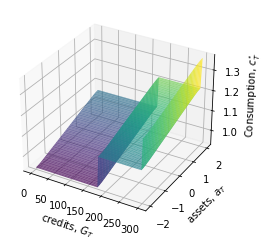

In [1114]:
# last period
a_mesh, G_mesh = np.meshgrid(par.a_grid[:],par.G_grid,indexing='ij')

t = par.T-42
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(G_mesh, a_mesh, sol.c[t,0,:,:],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
ax.set(xlabel='credits, $G_{T}$',ylabel='assets, $a_T$',zlabel='Consumption, $c_{T}^{\star}$');

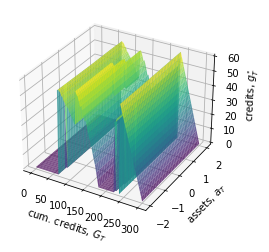

In [1115]:
t = par.T-44

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(G_mesh, a_mesh, sol.g[t,1,:,:],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
ax.set(xlabel='cum. credits, $G_{T}$',ylabel='assets, $a_T$',zlabel='credits, $g_{T}^{\star}$');

In [1116]:
par.Nm

10

In [1117]:
print(sol.c_s[par.T-5,0,:,29])

[0.570996 0.597315 0.617032 0.629505 0.652558 0.677985 0.703343 0.724842
 0.73645  0.757738 0.782972 0.808128 0.832592 0.841862 0.862415 0.887512
 0.912474 0.93885  0.946001 0.966972 0.991713 1.016603 1.042812 1.051876
 1.070879 1.095717 1.120541 1.146585 1.159686 1.174635 1.199584 1.224361
 1.250247 1.267462 1.278974 1.303704 1.328085 1.353764 1.373859 1.3858
 1.407318]


In [1118]:
print(sol.g[par.T-49,0,0,:])

[47.137024 46.692719 46.078217 45.369781 44.944977 44.307861 43.551819
 43.323212 46.895691 47.086212 46.810364 46.375031 45.88092  45.383972
 45.       44.501953 44.118439 43.610046 43.196045 42.783417 42.377563
 42.518555 47.922363 47.8461   47.472748 46.930664 46.286499 45.571838
 45.       44.551483 44.092438 43.437744 42.799896 42.152344 41.892883
 41.312073 40.799561 48.       48.       47.578674 47.013885 46.128204
 45.30368  44.784485 44.196533 43.353333 42.518555 42.       41.440521
 40.986511 39.       50.637543 49.654724 48.623383 47.844543 47.06012
 45.704041 45.       44.307861 43.142029 42.063812 41.638184 41.071289
 40.365143  0.        0.       52.092133 51.       49.367065 48.
 46.694916 45.196289 44.307861 42.518555 41.892975 41.111755 40.237427
 39.765472 39.543823 39.660736 60.       57.00001  54.00001  51.00001
 48.00001  45.00001  42.00001  39.00001  36.00001  33.00001  30.00001
 27.00001  24.00001  21.00001  18.00001  15.00001  12.00001   9.00001
  6.00001   3.00

In [1119]:
sol.V_s[par.T-9,0,2,0]
sol.V_w[par.T-9,0,0]

-11.008831644657429

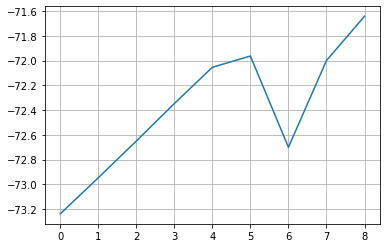

In [1120]:
y_ = [model.value_of_choice_s(2.0, 80.0, 0, 1.0, 220, t) for t in range(9)]
fig, ax = plt.subplots()
ax.grid()
plt.xticks(range(10))
ax.plot(y_)

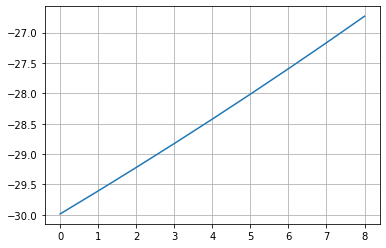

In [1121]:
z_ = [model.value_of_choice_w(2.0,0, 2.0, t) for t in range(9)]
fig, ax = plt.subplots()
ax.grid()
plt.xticks(range(10))
ax.plot(z_)

In [1122]:
model.simulate()

In [1123]:
# cb_counter = 0

# def callbackF(x, y, z):
#     global cb_counter
#     cb_counter += 1
#     print(cb_counter)
#     print("rho: %a, gamma_max: %a, gamma_min: %a" % (x, y, z))

# def pis(x,y,z):
#     callbackF(x,y,z)
    
#     model = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':10,'rho':x,'gamma_max':y,'gamma_min':z})
#     model.solve()
#     model.simulate()


#     helper = np.array([7,6,6,5,5,5,5,5,5,5])
#     ret = np.zeros(10)
#     step = np.zeros(10)
#     for i in range(10):
#         model_a = model.copy()

#         model_a.sim.m_init[:] = i
#         model_a.sim.a_init[:] = 0.0
#         model_a.sim.e_init[:] = 0
#         model_a.simulate()

#         listen = np.mean(model_a.sim.g,axis=0)
#         listen = np.sum(listen>0.001)
#         print("Type %a = %a " % (i, listen), end = "")
#         ret[i] = listen

#         step[i] = (listen - helper[i])**2

#     print("-----------------")
#     return np.sum(step)

In [1124]:
# obj = lambda x: pis(x[0],x[1],x[2])

# res = minimize(obj,[7.35,0.0105,0.0162], method='SLSQP', callback=callbackF, options={'disp': True},constraints=({'type': 'ineq', 'fun': lambda x: 1 if x[1] < x[2] else 0}))

# print(res.x[0])

In [1125]:
model_a = model.copy()

model_a.sim.m_init[:] = 0
model_a.sim.a_init[:] = 0.0
model_a.sim.e_init[:] = 0
model_a.simulate()

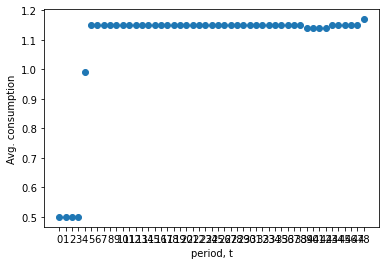

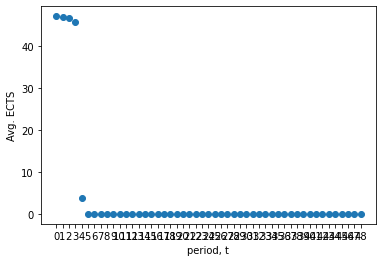

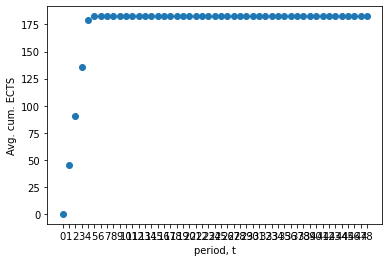

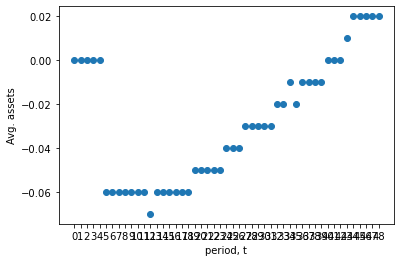

In [1126]:
#Simulation graphs
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.c,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. consumption',xticks=range(par.simT));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.g,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. ECTS',xticks=range(par.simT));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.G,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. cum. ECTS',xticks=range(par.simT));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_a.sim.a,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. assets',xticks=range(par.simT));

In [1127]:
asset_sim = model_a.sim.a
asset_sim[2]

array([ 0.      , -0.      , -0.      , -0.      , -0.      , -0.      ,
       -0.071058, -0.006694, -0.119887, -0.03174 ,  0.150022,  0.169721,
        0.092711, -0.021939, -0.083827, -0.35039 , -0.458373, -0.560354,
       -0.555946, -0.467778, -0.55404 , -0.52921 , -0.593617, -0.728981,
       -0.786032, -0.790398, -0.648473, -0.671137, -0.395044, -0.439389,
       -0.438924, -0.310765, -0.545014, -0.476221, -0.371011, -0.466291,
       -0.428409, -0.340532, -0.214288, -0.209784, -0.099598, -0.011956,
        0.123619,  0.111872,  0.05328 ,  0.108177,  0.111609,  0.080715,
        0.077617])

In [1128]:
cons_sim = model_a.sim.c
cons_sim[2]

array([0.5     , 0.5     , 0.5     , 0.5     , 0.5     , 1.15258 ,
       1.150013, 1.152094, 1.147939, 1.150934, 1.157462, 1.158176,
       1.155199, 1.150692, 1.148085, 1.13705 , 1.132121, 1.127192,
       1.126672, 1.129851, 1.125175, 1.125491, 1.121482, 1.113865,
       1.109961, 1.108141, 1.114348, 1.111502, 1.125501, 1.121836,
       1.120389, 1.127185, 1.109796, 1.112593, 1.118368, 1.108093,
       1.108356, 1.113679, 1.123476, 1.121922, 1.131653, 1.142269,
       1.16437 , 1.165041, 1.154544, 1.17502 , 1.188401, 1.179734,
       1.227627])

In [1129]:
cc_sim = model_a.sim.G
cc_sim[2,par.T-1]

for i in range(100):
    print(cc_sim[i,par.T-1])

180.9776512653326
183.32994674378256
185.4671391571287
184.13784354561597
187.0974741563762
180.84962266781952
181.4933852810636
182.4884548359862
180.04278883147677
181.60666512888088
186.6271534133449
181.83560019161646
180.0073616554531
184.59033470547067
180.31381720349108
182.98489652965978
182.42875432459005
181.46992514549518
181.97850931194006
182.32471538573577
182.3729296383778
185.45571482908463
182.5914173461963
180.02019524699
182.44152669401217
184.00514548383205
180.18051689481848
181.69024976612246
182.40839414731096
182.75589971386336
185.6439505912146
180.92892578012606
184.11575974820116
182.79724125306586
182.56450928247017
185.44269114319607
180.01249743339366
180.02779126533486
182.32038182963726
182.40039447004455
181.78978694306284
181.09565145267237
181.8842759582517
181.0453800543473
188.08487125583608
180.0021582503337
182.41454454176557
182.47093333539186
182.34654439354148
180.53671209176792
180.74828856747882
185.45571482908463
182.35831188762046
182.57090

In [1130]:
credit_sim = model_a.sim.g
credit_sim[2]

array([47.127603, 47.293011, 47.342133, 49.491371, 16.051499,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ])

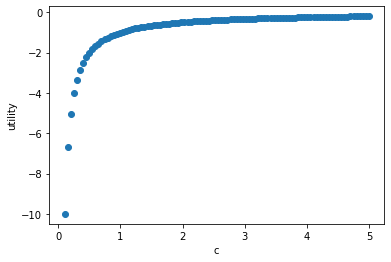

In [1131]:
liste = []
liste_2 = []
g_list = []
c_list = []

for g in np.linspace(0,300,num=300):
    hm = model.util_s(1.0,g,0,29)
    liste.append(hm)
    g_list.append(g)

for c in np.linspace(0.1,5,num=100):
    hm = model.util_s(c, 0, 0, 29)
    liste_2.append(hm)
    c_list.append(c)

fig, ax = plt.subplots()
ax.scatter(c_list,liste_2)
ax.set(xlabel='c',ylabel='utility');

In [1132]:
import math

beta = 0.1*np.sqrt(6)/math.pi

seed=69
rng = np.random.default_rng(seed=seed)


sim.xi = rng.gumbel(loc=0.0, scale=beta, size=10)
sim.xi

array([ 0.011003,  0.022603, -0.05413 , -0.022066,  0.033903, -0.041217,
        0.01871 ,  0.043118,  0.371854, -0.009851])

In [1133]:
# Parameters
h1 = 0.1*np.sqrt(6)/math.pi  # Scale parameter
#mu = 0.0

h2 = -h1 * np.euler_gamma  # Location parameter to center the distribution around zero

# Generate Gumbel-distributed preference shocks centered around zero
preference_shocks = rng.gumbel(h2, h1, size=1000000)

# Calculate the mean (expected value) of the preference shocks
mean_preference_shock = np.mean(preference_shocks)
print("Mean preference shock:", mean_preference_shock)

print(preference_shocks)

Mean preference shock: 8.767314582737433e-05
[-0.078835 -0.06076  -0.137456 ...  0.03517  -0.034345  0.118217]


In [1134]:
loc, scale = 1, 0.1
rv = stats.truncnorm(-1, 0, loc=loc, scale=scale)
r = rv.rvs(size=1000)

In [1135]:
print(r)

[0.998546 0.974567 0.947726 0.912848 0.964699 0.982271 0.90542  0.986221
 0.945762 0.936005 0.991746 0.905105 0.990947 0.921721 0.904005 0.938259
 0.961268 0.974277 0.989411 0.91691  0.968293 0.906641 0.906249 0.919446
 0.985582 0.950654 0.904127 0.932373 0.940744 0.94517  0.999625 0.94527
 0.983949 0.923354 0.966944 0.986693 0.964882 0.925974 0.959746 0.998237
 0.953936 0.990882 0.941177 0.9689   0.976195 0.968202 0.914738 0.937235
 0.953911 0.91331  0.984882 0.989737 0.932066 0.92471  0.931392 0.942034
 0.945136 0.932971 0.999288 0.993681 0.901524 0.951787 0.978744 0.975062
 0.964538 0.927057 0.95001  0.951405 0.902791 0.95971  0.932344 0.9024
 0.997234 0.975397 0.971104 0.985989 0.946665 0.910585 0.972242 0.959434
 0.950745 0.973685 0.900284 0.920821 0.971871 0.97932  0.985395 0.971789
 0.907138 0.987125 0.991887 0.994036 0.936061 0.938367 0.994125 0.945602
 0.905374 0.935638 0.937166 0.931139 0.916145 0.948456 0.998756 0.981153
 0.959889 0.977081 0.925234 0.976133 0.930198 0.912927

In [1136]:
from consav.quadrature import log_normal_gauss_hermite


par.xi_grid,par.xi_weight = log_normal_gauss_hermite(0.1,10,mu=1.0)

In [1137]:

for i in range(10):
    if par.xi_grid[i]>1.0:
        par.xi_grid[i] = 1.0

par.xi_grid

array([0.612047, 0.69546 , 0.776132, 0.859333, 0.947912, 1.      ,
       1.      , 1.      , 1.      , 1.      ])

In [1138]:
par.xi_weight

array([0.000004, 0.000758, 0.019112, 0.135484, 0.344642, 0.344642,
       0.135484, 0.019112, 0.000758, 0.000004])

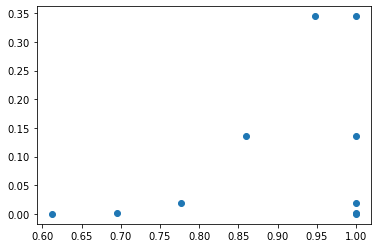

In [1139]:
fig, ax = plt.subplots()
ax.scatter(par.xi_grid,par.xi_weight)
ax.set(xlabel='',ylabel='');

In [1140]:
rng = np.random.default_rng(seed=par.seed) #set seed
sim.xi = np.exp(par.sigma_s*rng.normal(size=shape) - 0.5*par.sigma_s**2)

sim.xi

for i in range(par.simN):
    for t in range(par.simT):
        if sim.xi[i,t]>1.0:
            sim.xi[i,t] = 1.0

IndexError: index 100 is out of bounds for axis 0 with size 100

In [ ]:
shape = (par.simN, par.simT)  

sim.xi = np.exp(par.sigma_s*rng.normal(size=shape) - 0.5*par.sigma_s**2)

  

for i in range(par.simN):
    for t in range(par.simT):
        if sim.xi[i,t]>1.0:
            sim.xi[i,t] = 1.0

sim.xi

array([[1.      , 1.      , 0.950105, ..., 0.969435, 0.975822, 1.      ],
       [0.932306, 1.      , 1.      , ..., 1.      , 0.944183, 1.      ],
       [1.      , 0.960075, 0.955079, ..., 1.      , 1.      , 0.97904 ],
       ...,
       [0.967884, 0.978302, 1.      , ..., 0.972824, 0.91015 , 0.926099],
       [1.      , 1.      , 1.      , ..., 0.901432, 1.      , 0.96701 ],
       [0.954034, 1.      , 1.      , ..., 0.982412, 1.      , 1.      ]])